In [ ]:
!gdown 1vC4ppmPvH_I7YuXt2yii59huH_67ijxP

Downloading...
From: https://drive.google.com/uc?id=1vC4ppmPvH_I7YuXt2yii59huH_67ijxP
To: /content/nlp_emotion_dataset.zip
100% 2.07M/2.07M [00:00<00:00, 173MB/s]


In [ ]:
import zipfile
zipfile.ZipFile('/content/nlp_emotion_dataset.zip').extractall()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_val = pd.read_csv('/content/val.csv')

In [ ]:
df_train

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
df_train.shape, df_test.shape, df_val.shape

((16000, 2), (2000, 2), (2000, 2))

In [ ]:
df_train.Sentiment.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
labels = {'joy' : 0,
    'anger' : 1,
    'love' : 2,
    'sadness' : 3,
    'fear' : 4,
    'surprise' : 5
}

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

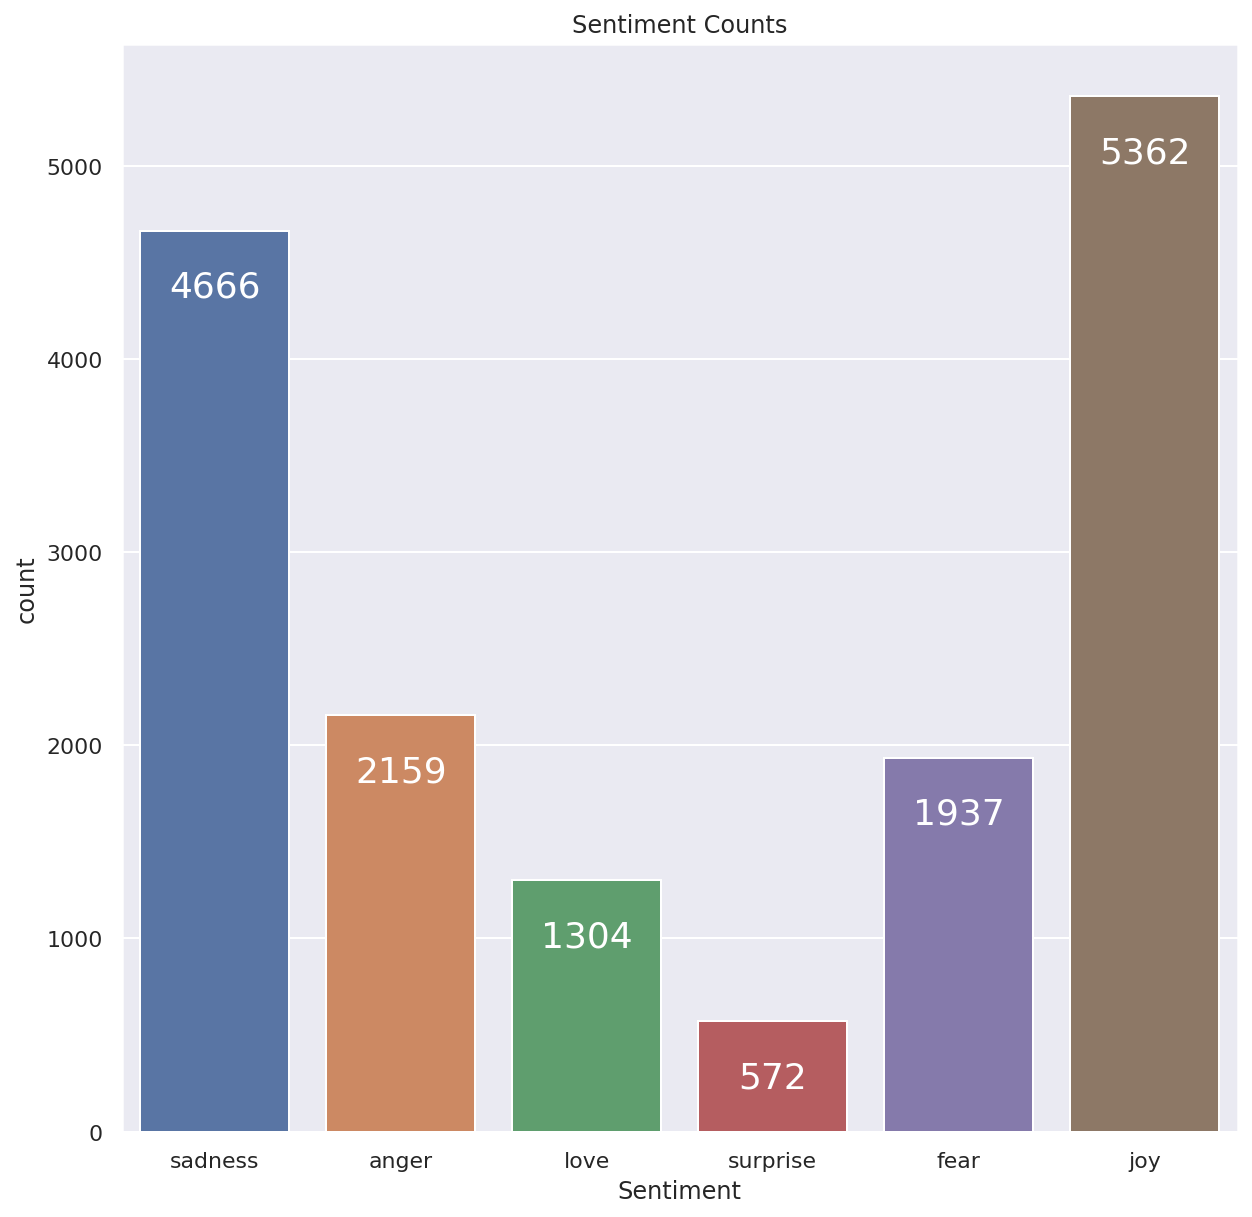

In [ ]:
ax = sns.countplot(x=df_train.Sentiment)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
plt.title('Sentiment Counts')
plt.show()

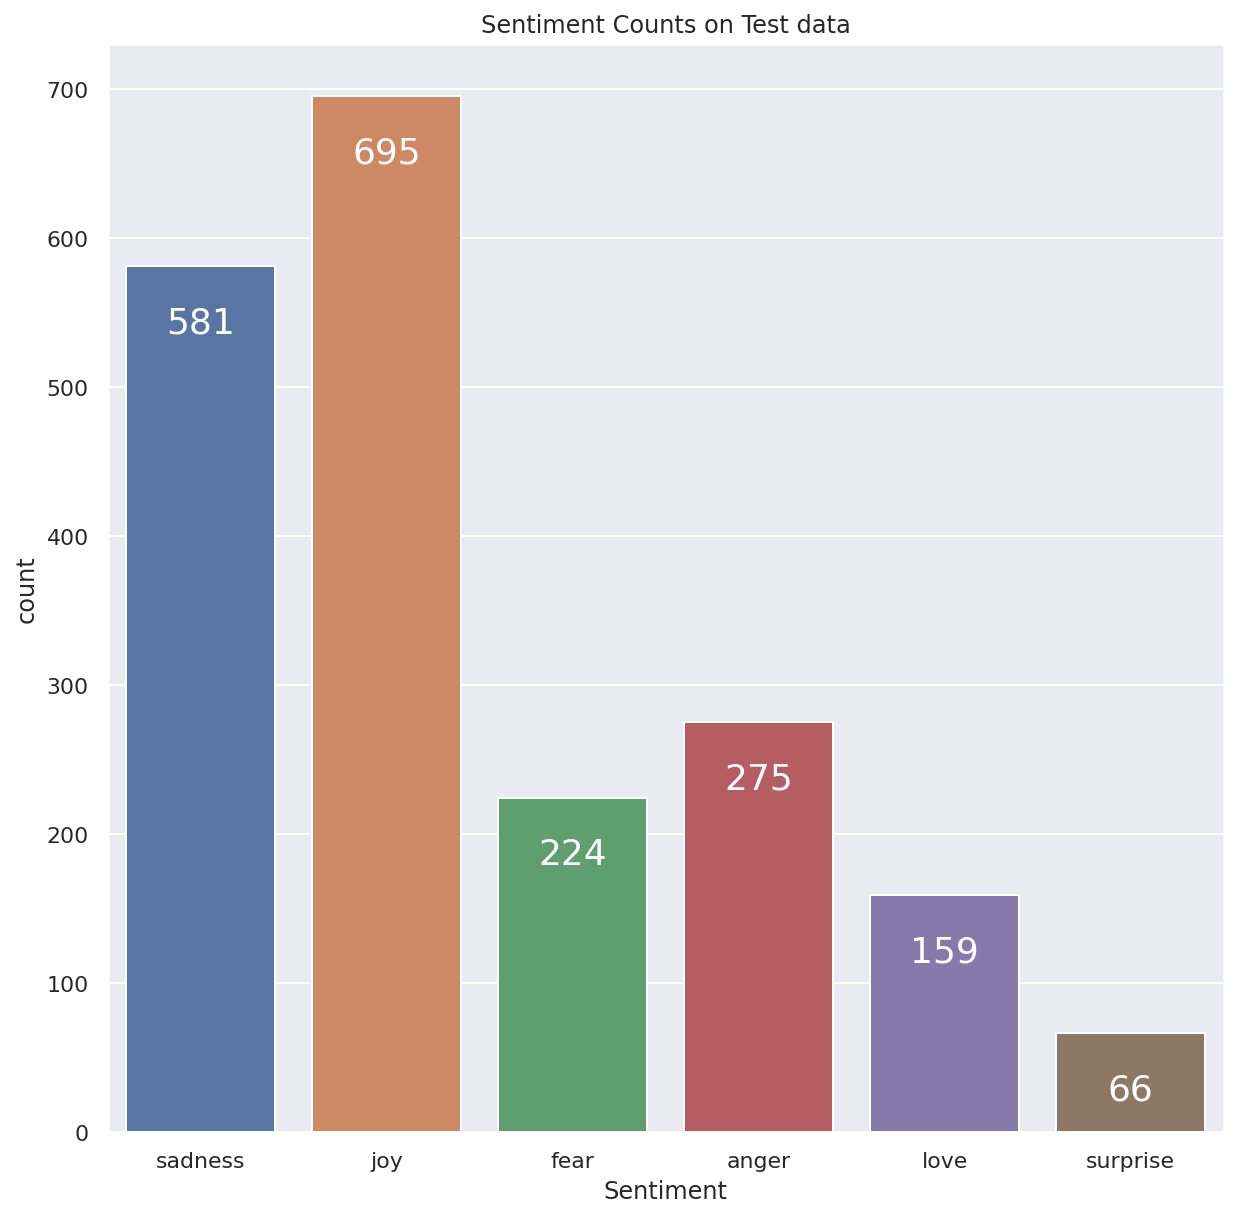

In [ ]:
ax = sns.countplot(x=df_test.Sentiment)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
plt.title('Sentiment Counts on Test data')
plt.show()

In [ ]:
%pip install text_hammer -q

     |████████████████████████████████| 115 kB 8.7 MB/s 


In [ ]:
import text_hammer as th

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


In [ ]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    # df[column] = df[column].progress_apply(lambda x: ps.remove_stopwords(x))  

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 1.92 ms, sys: 0 ns, total: 1.92 ms
Wall time: 5.84 ms


In [ ]:
df_cleaned_train = text_preprocessing(df_train, 'Input')

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

In [ ]:
df_cleaned_train

,Input,Sentiment
0,I do not feel humiliate,sadness
1,I can go from feel so hopeless to so damn hope...,sadness
2,I m grab a minute to post I feel greedy wrong,anger
3,I am ever feel nostalgic about the fireplace I...,love
4,I am feel grouchy,anger
...,...,...
15995,I just have a very brief time in the beanbag a...,sadness
15996,I am now turn and I feel pathetic that I am st...,sadness
15997,I feel strong and good overall,joy
15998,I feel like this was such a rude comment and I...,anger


In [ ]:
data = {
    'df_train' : df_cleaned_train,
    'df_test' : df_test,
    'df_val' : df_val,
    'labels' : labels
}

df_cleaned_train['Sentiment'] = df_cleaned_train.Sentiment.replace(labels)
df_test['Sentiment'] = df_test.Sentiment.replace(labels)
df_val['Sentiment'] = df_val.Sentiment.replace(labels)

In [ ]:
import pickle
with open('df_cleaned_train_test_val.pkl', 'wb') as f:
    pickle.dump(data, f)